# Regresión lineal

### Configuración de los gráficos

Para que el notebook nos renderize los gráficos debemos primero ejecutar un par de líneas:

In [1]:
import matplotlib
%matplotlib inline
#matplotlib.use('Agg')
from matplotlib import pyplot as plt

### Los datos

Definimos nuestros conjunto de datos. Vamos a usar pandas para ello:

In [2]:
import pandas as pd
data = pd.DataFrame(data={"Precio": [100,150,230,255,300,290,310,295,315,298,294],
                          "Metros": [490,600,650,800,900,1100,1400,1600,1800,1900,2200],
                          "Habitaciones": [1,2,1,3,3,4,3,3,2,4,4]})

y = data.Precio
X = data[['Metros', 'Habitaciones']]
X

,Metros,Habitaciones
0,490,1
1,600,2
2,650,1
3,800,3
4,900,3
5,1100,4
6,1400,3
7,1600,3
8,1800,2
9,1900,4


## Hipótesis

Definimos nuestra hipótesis de relación lineal $\mathbf{x}^T\mathbf{w} = y$:
  - Usamos numpy para realizar las operaciones vectoriales.
  - Tras la multiplicación usamos la suma. Le indicamos hacer la suma por filas.

In [3]:
import numpy as np
def H(x, w):
    if len(x.shape) > 1:
        return np.sum(x*np.array(w), axis=1)
    else:
        return x*np.array(w)

H(X, [0.2, 0.3])  

0      98.3
1     120.6
2     130.3
3     160.9
4     180.9
5     221.2
6     280.9
7     320.9
8     360.6
9     381.2
10    441.2
dtype: float64

Podemos crear nuevas columnas en nuestra tabla para ver la predicción y el error por cada muestra:

In [4]:
data['Prediccion'] = H(X, [0.2, 0.6])  
data['Error'] = abs(data['Precio'] - data['Prediccion'])

data

,Habitaciones,Metros,Precio,Prediccion,Error
0,1,490,100,98.6,1.4
1,2,600,150,121.2,28.8
2,1,650,230,130.6,99.4
3,3,800,255,161.8,93.2
4,3,900,300,181.8,118.2
5,4,1100,290,222.4,67.6
6,3,1400,310,281.8,28.2
7,3,1600,295,321.8,26.8
8,2,1800,315,361.2,46.2
9,4,1900,298,382.4,84.4


## Función de coste

Definimos la función de coste $\frac{1}{2m}\sum_i^m (h_\mathbf{w}(\mathbf{x^i}) - y_i)^2$:

In [5]:
def J(X, y, w):
    return (0.5 / X.shape[0]) * sum((H(X, w) - y) ** 2)

J(X, y, [0.19, 0.2])

3108.5572727272734

Podemos ahora ver el error cuadrático por muestra de la misma forma:

In [6]:
data['Error²'] = abs(data['Precio'] - data['Prediccion'])**2
data

,Habitaciones,Metros,Precio,Prediccion,Error,Error²
0,1,490,100,98.6,1.4,1.96
1,2,600,150,121.2,28.8,829.44
2,1,650,230,130.6,99.4,9880.36
3,3,800,255,161.8,93.2,8686.24
4,3,900,300,181.8,118.2,13971.24
5,4,1100,290,222.4,67.6,4569.76
6,3,1400,310,281.8,28.2,795.24
7,3,1600,295,321.8,26.8,718.24
8,2,1800,315,361.2,46.2,2134.44
9,4,1900,298,382.4,84.4,7123.36


## Búsqueda de los mejores pesos

Ahora tenemos que buscar los mejores pesos posibles para solucionar nuestro problema de predicción. Vamos a optar por una extrategía muy sencilla: 
  - Tomamos un peso aletorio para iniciar la búsqueda
  - Iteramos un número de veces establecido:
      - En cada iteración aplicamos un desplazamiento aletorio a a la mejor medida obtenida

In [7]:
J(data.Metros, data.Precio, [0.2])

3219.0454545454545

Mejora: 886247.738852 (w1: -0.798883)
Mejora: 775737.379235 (w1: -0.734984)
Mejora: 188292.553748 (w1: -0.263148)
Mejora: 137677.835443 (w1: 0.575158)
Mejora: 59309.241004 (w1: 0.438681)
Mejora: 10638.746362 (w1: 0.098188)
Mejora: 4151.857648 (w1: 0.223218)
Mejora: 3841.883148 (w1: 0.161084)
Mejora: 3132.823683 (w1: 0.193536)
Mejora: 3121.476349 (w1: 0.187242)
Mejora: 3121.327655 (w1: 0.191504)
Mejora: 3117.844370 (w1: 0.190171)
Mejora: 3117.533749 (w1: 0.189905)
Mejora: 3117.319680 (w1: 0.189555)


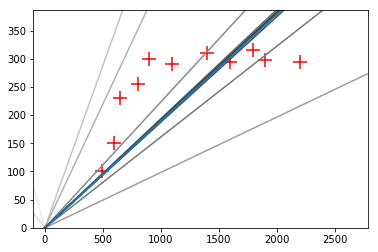

In [8]:
# Búsqueda
import random
import sys

ax = plt.gca()
ax.set_ylim([min(0, y.min() - y.std()), y.max() + y.std()])
ax.set_xlim([X.Metros.min() - X.Metros.std(), X.Metros.max() + X.Metros.std()])


# inicialización de variables
j_min = float("inf")
best_w1 = 0
history = []

# número de iteraciones
num_iter = 10000
for it in range(0,num_iter):
    phi1 = best_w1 + random.uniform(-1,1)
    j = J(data.Metros, data.Precio, [phi1])

    if j < j_min:
        print ("Mejora: %f (w1: %f)" % (j, phi1))
        j_min = j
        best_w1 = phi1
        history.append((best_w1))
        

plt.scatter(X.Metros, y, marker='+', color='r', s=200)
for i, (p1) in enumerate(history[:-1]):
    X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
    gray = 1- (i/(len(history)-1))

    plt.plot(X_plot, X_plot*p1, '-', color=str(gray))


# Add correlation line
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
plt.plot(X_plot, X_plot*best_w1, '-', linewidth=2)
plt.show()

## Implementación como una clase

Vamos ahora a implementar lo anterior más seriamente. Vamos a hacer una clase para que ajuste un modelo de regresión lineal. Recordar el objetivo de una clase:
    - Mantener el estado y definir que acciones se puede realizar sobre dicho estado


In [9]:
import numpy as np
import random
import sys

class RegresionLineal:
    
    def __init__(self, learning_rate=100):
        '''
        Inicialización del modelo.
        Parametros:
          - learning_rate: define el desplazamiento máximo sobre los pesos en cada iteración.
        '''
        self.learning_rate = learning_rate
    
    def _H(self, X, w):
        '''
        Establece la hipótesis de la regresión lineal. Devuelve la evaluación de dicha hipótesis.
        '''
        raise Exception("No implement")

    def _J(self, X, y, w):
        '''
        Establece la función de coste y devuelve la evaluación de dicha función de coste
        '''
        raise Exception("No implement")
    
    def fit(self, X, y, num_iter=100, verbose=True, plot=False):
        '''
        Lleva a cabo la búsqueda de los mejores pesos dado los datos de entrada X y la 
        variable respuesta y.
        Parámetros:
          - X: datos de entrada en formato de tabla. Cada fila corresponde a una muestra y cada columna a un atributo.
          - y: variable de respuesta. Debe contener tantos elementos como filas tiene la entrada.
          - num_iter: número de iteraciones que queremos ejecutar de algoritmo de búsqueda.
          - verbose: si es True imprimirá por pantalla mensajes sobre el progreso
          - plot: si es True mostrará un gráfico de la línea de regresión. Solo en el caso de tener un solo atributo.
        '''
        
        # Comprobamos que el número de filas de la entrada corresponde con el número 
        # de elementos de la variable de respuesta
        # ....
        
        # Usaremos esta lista para guardar el progreso del ajuste
        # ....

        # Establecemos el valor del coste al inicio lo mayor posible    
        # ....
        
        # Inicializamos los pesos
        # ....            
        
        # Bucle de iteraciones
        # ....
            # actualizamos los pesos aplicando el desfase de los pesos
            # ....
            
            # calculamos el coste con los nuevos pesos
            # ....

            # si encontramos mejora, actualizamos el los pesos del modelo y guardamos 
            # la mejora en el histórico
            # ....
            
        # si se pedido mostrar el gráfico del progreso y tenemos un solo atributo 
        # pintamos las rectas encontradas      
        # ....        
        
        raise Exception("No implement")
            
            
    def predict(self, X):
        '''
        Realiza la predicción para los datos de entrada X
        '''
        raise Exception("No implement")
      

Una posible implementación:

In [10]:
import numpy as np
import random
import sys


class RegresionLineal:
    
    def __init__(self, learning_rate=100):
        '''
        Inicialización del modelo.
        Parametros:
          - learning_rate: define el desplazamiento máximo sobre los pesos en cada iteración.
        '''
        self.learning_rate = learning_rate
        self.w = None
       
    
    def _H(self, X, w):
        '''
        Establece la hipótesis de la regresión lineal. Devuelve la evaluación de dicha hipótesis.
        '''
        if len(X.shape) > 1:
            return np.sum(X*np.array(w), axis=1)
        else:
            return X*np.array(w)

    def _J(self, X, Y, w):
        '''
        Establece la función de coste y devuelve la evaluación de dicha función de coste
        '''
        return (0.5 / X.shape[0]) * sum((H(X, w) - y) ** 2)
    
   
    def fit(self, X, y, num_iter=100, verbose=True, plot=False):
        '''
        Lleva a cabo la búsqueda de los mejores pesos dado los datos de entrada X y la 
        variable respuesta y.
        Parámetros:
          - X: datos de entrada en formato de tabla. Cada fila corresponde a una muestra y cada columna a un atributo.
          - y: variable de respuesta. Debe contener tantos elementos como filas tiene la entrada.
          - num_iter: número de iteraciones que queremos ejecutar de algoritmo de búsqueda.
          - verbose: si es True imprimirá por pantalla mensajes sobre el progreso
          - plot: si es True mostrará un gráfico de la línea de regresión. Solo en el caso de tener un solo atributo.
        '''
        
        # Comprobamos que el número de filas de la entrada corresponde con el número 
        # de elementos de la variable de respuesta
        if len(X) != len(y):
            raise Exception("El número de filas de X y el número de elemento en y no se corresponden.")

        # Usaremos esta lista para guardar el progreso del ajuste
        self.history = []

        # Establecemos el valor del coste al inicio lo mayor posible    
        j_min = float("inf")
        
        # Inicializamos los pesos
        num_attr = 1 if len(X.shape) == 1 else X.shape[0]
        self.w = [.0] * num_attr
        current_w = [.0] * num_attr
            
        
        for it in range(0,num_iter):
            # actualizamos los pesos aplicando el desfase de los pesos
            for iattr in range(num_attr):
                current_w[iattr] = self.w[iattr] + random.uniform(-self.learning_rate,self.learning_rate)
            
            # calculamos el coste con los nuevos pesos
            j = self._J(X, y, current_w)

            # si encontramos mejora, actualizamos el los pesos del modelo y guardamos 
            # la mejora en el histórico
            if j < j_min:
                if verbose:
                    print ("Mejora: %f (%s)" % (j, current_w))
                    
                j_min = j
                self.w = current_w[:]
                self.history.append(current_w[:])

        # si se ha pedido mostrar el gráfico del progreso y tenemos un solo atributo 
        # pintamos las rectas encontradas      
        if plot and num_attr == 1:
            axes = plt.gca()
            axes.set_ylim([y.min() - y.std(), y.max() + y.std()])
            axes.set_xlim([X.min() - X.std(), X.max() + X.std()])

            plt.scatter(X, y, marker='+', color='r', s=200)
            
            for i, w in enumerate(self.history[:-1]):
                X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
                gray = 1-i/(len(self.history)-1)
                plt.plot(X_plot, self._H(X_plot, w), '-', color=str(gray))


            # Add correlation line
            X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
            plt.plot(X_plot, self._H(X_plot, self.w), '-', linewidth=2)

            
            plt.show()
            
    def predict(self, X):
        '''
        Realiza la predicción para los datos de entrada X
        '''
        if self.w is None:
            raise Exception("El modelo no ha sido ajustado")
            
        return self._H(X, self.w)


Mejora: 23827.474178 ([0.03805072645561071])
Mejora: 14657.913347 ([0.07641762309189244])
Mejora: 8168.016027 ([0.11465390609335822])
Mejora: 7773.974155 ([0.1176285227983721])
Mejora: 4469.798308 ([0.15071665363068426])
Mejora: 3200.637507 ([0.1989926003722597])
Mejora: 3184.369701 ([0.18077927420597228])
Mejora: 3143.615596 ([0.18399684269759986])
Mejora: 3128.868998 ([0.1858144289771387])
Mejora: 3117.444397 ([0.18979744251028913])
Mejora: 3117.375975 ([0.18968983558069602])
Mejora: 3117.330669 ([0.18958845130265564])
Mejora: 3117.303378 ([0.18948367323365978])
Mejora: 3117.299243 ([0.1893301936939727])
Mejora: 3117.296044 ([0.18937510492423432])
Mejora: 3117.295865 ([0.1894014137654321])


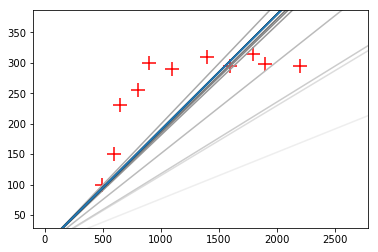

In [11]:
reg = RegresionLineal(learning_rate=0.05)
reg.fit(data.Metros, data.Precio, num_iter=10000, plot=True)

## Serialización de objetos

Una de las cosas más interesantes al tener nuestro modelo creado en un clase es que lo podemos guardar a disco y utlizarlo posteriomente:

In [87]:
import pickle as pk
pk.dump(reg, open("rl.pk", "wb"))

Ahora lo podemos leer:

In [88]:
my_reg = pk.load(open("rl.pk", "rb"))
my_reg

Y podemos consultar sus atributos:

In [89]:
my_reg.w

[0.18938652891919872]

In [90]:
my_reg.history

[[-0.03615436164139694],
 [0.010588161859205254],
 [0.03212417698991247],
 [0.060657015952194006],
 [0.08460506520772079],
 [0.09084692791078106],
 [0.14020313740295742],
 [0.18044012686912525],
 [0.193648687738352],
 [0.1884133513702123],
 [0.19025614614881176],
 [0.18875504677948862],
 [0.189170378846558],
 [0.18931896913930774],
 [0.18944199377159815],
 [0.18937858290608697],
 [0.18938215628941418],
 [0.18938652891919872]]

## La intercepción

La implementación anterior no tiene en cuenta la intercepción de la línea de regresión con el eje X. Este puede ser implementado introduciendo un atributo ficticio con valor 1:

Mejora: 798613.554247 ([-0.7481200292913239, -0.6489659505837218])
Mejora: 11566.442229 ([0.09260789527775515, 0.1432992261803745])
Mejora: 8303.799252 ([0.2648884476258022, 0.4967117736747275])
Mejora: 3418.048202 ([0.20776732951881982, 1.3469809818365723])
Mejora: 3278.909522 ([0.17304663212271953, 1.7536064579694837])
Mejora: 3089.726553 ([0.19030564272702244, 1.1411931093696408])
Mejora: 3089.327801 ([0.19123603687239132, 1.3156087864135877])
Mejora: 3082.370074 ([0.1913559033031833, 1.6499018319526648])
Mejora: 3082.279863 ([0.18938420738903616, 1.3551899161922114])
Mejora: 3075.219919 ([0.1851758157256056, 1.8934314324435213])
Mejora: 3072.431454 ([0.18670937670221832, 1.7778566027239855])
Mejora: 3065.913962 ([0.18472012006025285, 2.288937913418503])
Mejora: 3047.263557 ([0.1909033984130284, 3.121212436950896])
Mejora: 3045.201169 ([0.18986523390790766, 2.9569580633049446])
Mejora: 3026.796535 ([0.1897214162703058, 3.7383068856784596])
Mejora: 2995.157138 ([0.18502136892759036, 

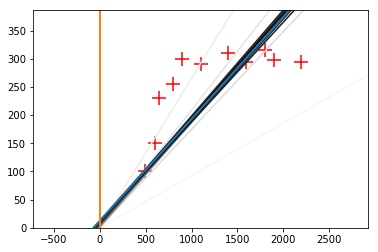

In [12]:
import numpy as np
import random
import sys

class RegresionLineal:
    
    def __init__(self, learning_rate=100, fit_intercept=False):
        '''
        Inicialización del modelo.
        Parametros:
          - learning_rate: define el desplazamiento máximo sobre los pesos en cada iteración.
        '''
        self.learning_rate = learning_rate
        self.fit_intercept = fit_intercept
        self.w = None
       
    
    def _H(self, X, w):
        '''
        Establece la hipótesis de la regresión lineal. Devuelve la evaluación de dicha hipótesis.
        '''
        if len(X.shape) > 1:
            return np.sum(X*np.array(w), axis=1)
        else:
            return X*np.array(w)

    def _J(self, X, Y, w):
        '''
        Establece la función de coste y devuelve la evaluación de dicha función de coste
        '''
        return (0.5 / X.shape[0]) * sum((H(X, w) - y) ** 2)
    
   
    def fit(self, X, y, num_iter=100, verbose=True, plot=False):
        '''
        Lleva a cabo la búsqueda de los mejores pesos dado los datos de entrada X y la 
        variable respuesta y.
        Parámetros:
          - X: datos de entrada en formato de tabla. Cada fila corresponde a una muestra y cada columna a un atributo.
          - y: variable de respuesta. Debe contener tantos elementos como filas tiene la entrada.
          - num_iter: número de iteraciones que queremos ejecutar de algoritmo de búsqueda.
          - verbose: si es True imprimirá por pantalla mensajes sobre el progreso
          - plot: si es True mostrará un gráfico de la línea de regresión. Solo en el caso de tener un solo atributo.
        '''
        
        # Comprobamos que el número de filas de la entrada corresponde con el número 
        # de elementos de la variable de respuesta
        if len(X) != len(y):
            raise Exception("El número de filas de X y el número de elemento en y no se corresponden.")

        if type(X) is pd.DataFrame:
            X = X.values
        
        if len(X.shape) == 1:
            X = X.reshape(X.shape[0],1)

        # Si se quiere ajustar la intercepción debemos introducir un nuevo atributo ficticio
        if self.fit_intercept:
            X = np.hstack((X, np.array([1.] * X.shape[0]).reshape(X.shape[0],1)))
        
            
        # Usaremos esta lista para guardar el progreso del ajuste
        self.history = []

        # Establecemos el valor del coste al inicio lo mayor posible    
        j_min = float("inf")
        
        # Inicializamos los pesos
        num_attr = 1 if len(X.shape) == 1 else X.shape[1]
        self.w = [.0] * num_attr
        current_w = [.0] * num_attr
            
        
        for it in range(0,num_iter):
            # actualizamos los pesos aplicando el desfase de los pesos
            for iattr in range(num_attr):
                current_w[iattr] = self.w[iattr] + random.uniform(-self.learning_rate,self.learning_rate)
            
            # calculamos el coste con los nuevos pesos
            j = self._J(X, y, current_w)

            # si encontramos mejora, actualizamos el los pesos del modelo y guardamos 
            # la mejora en el histórico
            if j < j_min:
                if verbose:
                    print ("Mejora: %f (%s)" % (j, current_w))
                    
                j_min = j
                self.w = current_w[:]
                self.history.append(current_w[:])

        # si se ha pedido mostrar el gráfico del progreso y tenemos un solo atributo 
        # pintamos las rectas encontradas      
        if plot and (num_attr == 1 or num_attr == 2 and self.fit_intercept):
            axes = plt.gca()
            axes.set_ylim([min(0, y.min() - y.std()), y.max() + y.std()])
            axes.set_xlim([min(0, X.min() - X.std()), X.max() + X.std()])
            
            for i, w in enumerate(self.history[:-1]):
                X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
                if self.fit_intercept:
                    X_plot = np.hstack((X_plot.reshape(X_plot.shape[0],1), 
                                        np.array([1.] * X_plot.shape[0]).reshape(X_plot.shape[0],1)))
                    
                gray = 1-i/(len(self.history)-1)
                plt.plot(X_plot, self._H(X_plot, w), '-', color=str(gray))


            # Add correlation line
            X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
            if self.fit_intercept:
                X_plot = np.hstack((X_plot.reshape(X_plot.shape[0],1), 
                                    np.array([1.] * X_plot.shape[0]).reshape(X_plot.shape[0],1)))

            plt.plot(X_plot, self._H(X_plot, self.w), '-', linewidth=2)

            if self.fit_intercept:
                plt.scatter(X[:, :-1], y, marker='+', color='r', s=200)
            else:
                plt.scatter(X, y, marker='+', color='r', s=200)

            
            plt.show()
            
    def predict(self, X):
        '''
        Realiza la predicción para los datos de entrada X
        '''
        if self.w is None:
            raise Exception("El modelo no ha sido ajustado")
            
        return self._H(X, self.w)
    
reg = RegresionLineal(learning_rate=1, fit_intercept=True)
reg.fit(X.Metros, data.Precio, num_iter=10000, plot=True)